In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Boston House Pricing Dataset

In [5]:
boston = pd.read_csv("data/Boston.csv")

In [6]:
boston.info()
# MENV: Median value of owner-occupied homes in $1000s (target variable)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Preparing the data

In [11]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [12]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [13]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
##EDA
#Correlation
boston.corr()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [15]:
!pip install seaborn

import seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


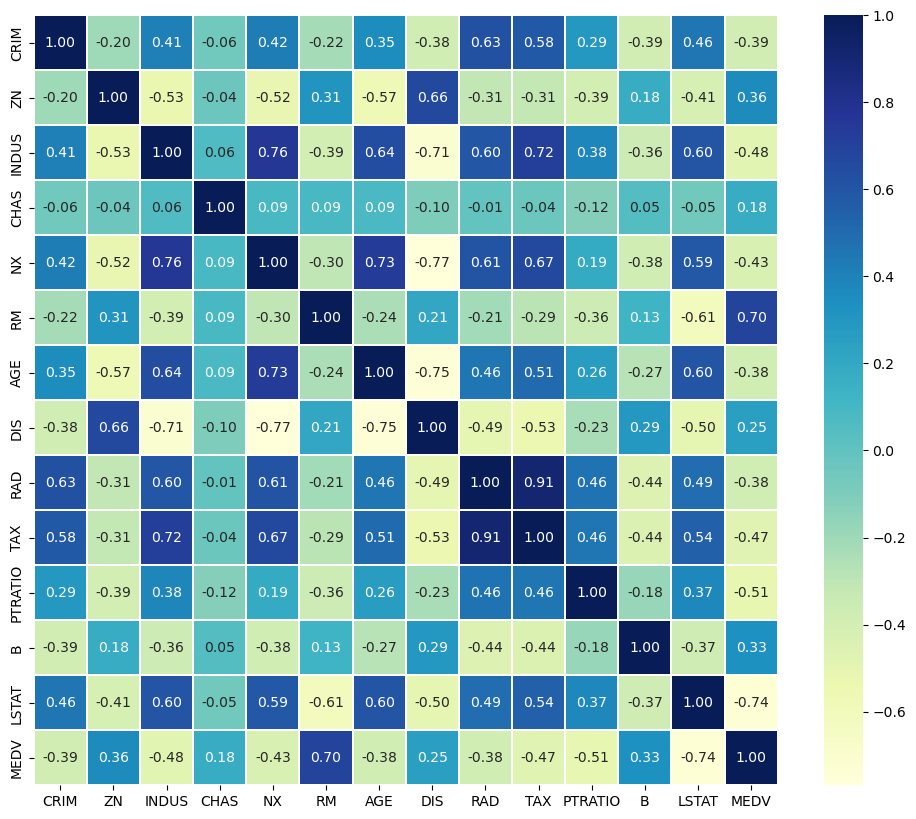

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(
    boston.corr(),
    annot=True,
    linewidths=0.2,
    fmt=".2f",
    cmap="YlGnBu"
);

## Analyze the correlated features

Text(0, 0.5, 'MEDV')

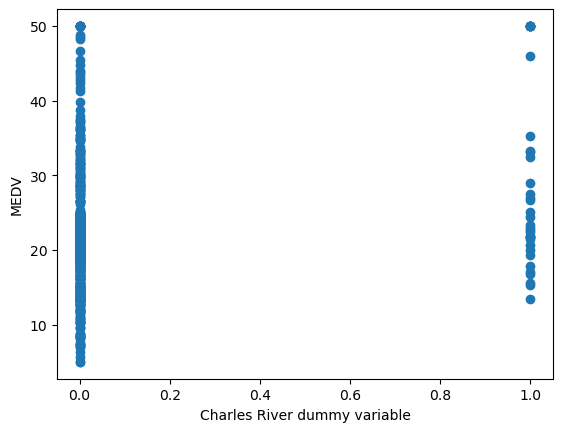

In [17]:
plt.scatter(boston['CHAS'], boston['MEDV'])
plt.xlabel("Charles River dummy variable")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

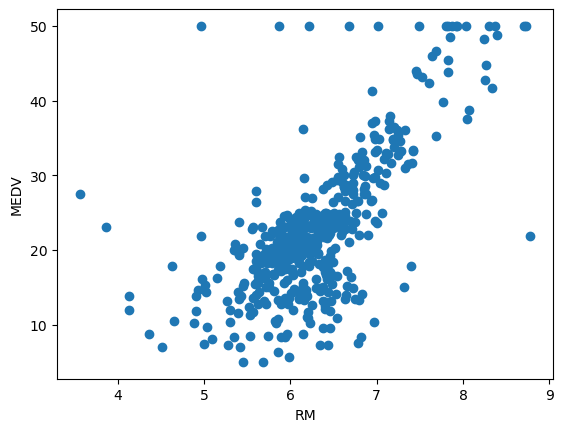

In [18]:
plt.scatter(boston['RM'],boston['MEDV'])
plt.xlabel("RM")
plt.ylabel("MEDV")

<Axes: xlabel='RM', ylabel='MEDV'>

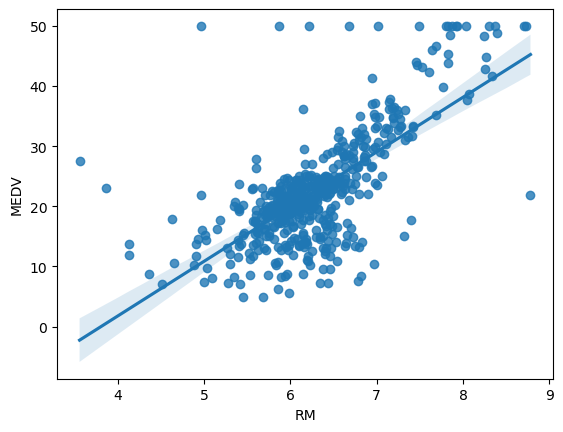

In [19]:
sns.regplot(x="RM",y="MEDV",data=boston)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

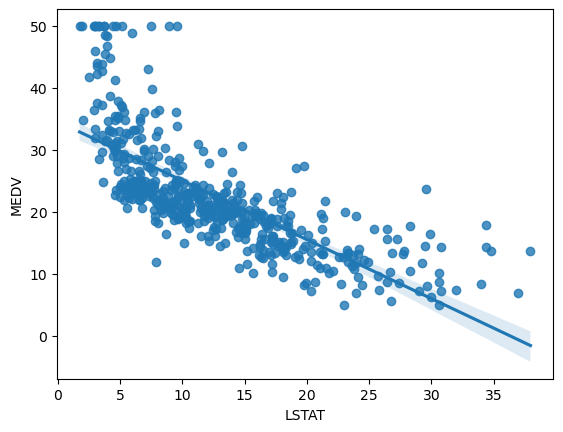

In [20]:
sns.regplot(x="LSTAT",y="MEDV",data=boston)

In [21]:
X = boston.drop('MEDV',axis=1)
y = boston.MEDV

In [22]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [24]:
##split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [26]:
X_test

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22


In [27]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [28]:
##Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.fit_transform(X_test)

In [32]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [33]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [34]:
X_test

array([[-0.41814319, -0.45257245, -1.06299571, ..., -1.2129824 ,
         0.45712276, -0.5785895 ],
       [-0.42197518,  1.15375592, -0.70943587, ..., -0.67841202,
         0.47107234, -1.34619278],
       [-0.41662948, -0.45257245,  2.48608589, ...,  0.65801394,
         0.40341687,  0.67938829],
       ...,
       [-0.37095894, -0.45257245, -0.74089671, ..., -0.78532609,
         0.32260895, -1.19295074],
       [ 0.17707231, -0.45257245,  1.04188384, ...,  0.71147097,
        -2.48534188,  0.42166305],
       [ 0.64807771, -0.45257245,  1.04188384, ...,  0.71147097,
         0.38757414,  0.45231146]])

In [35]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [37]:
lg.fit(X_train, y_train)

LinearRegression()

In [38]:
lg.fit(X_train, y_train)

LinearRegression()

In [39]:
print(lg.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [40]:
print(lg.intercept_)

23.01581920903955


In [41]:
lg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
lg_pred = lg.predict(X_test)

In [43]:
lg_pred

array([30.77834822, 38.66581541, 16.96705276, 26.79035818, 20.36068008,
       24.89386356, 18.98948959, 15.44554414, 24.50205701, 22.12455513,
       27.16709892, 20.60218969, -4.91312377, 23.45520373, 20.44300739,
       27.97454642, 21.82481134,  6.80793603, 43.13876668, 19.08804672,
       28.93737925, 31.91943808, 12.05148619, 25.41493356, 19.60614164,
       17.23543021, 24.61263361, 16.907528  , 24.25623469, 20.73183868,
       23.98650325, 26.66317526, 27.45468242, 19.57475267, 18.15660164,
       19.94422395, 33.04896681, 21.26475982, 25.83570427, 26.36436267,
       15.22545112, 33.61610719, 45.24385042, 18.83620774, 28.91584593,
       18.49470905, 14.91054896, 27.65199578, 21.75498681, 32.36964545,
       23.36168054, 36.5955736 , 16.82098601, 27.59874838, 42.39261672,
       24.39945725, 20.42785358, 34.46608842, 26.52068304, 14.0304141 ,
       24.03170468, 32.40960974, 33.59067192, 17.33583061, 22.46180876,
       18.28308242, 22.01801285, 27.57486429, 32.54366102, 13.95

In [44]:
print(len(lg_pred))

152


In [45]:
print(len(X_test))

152


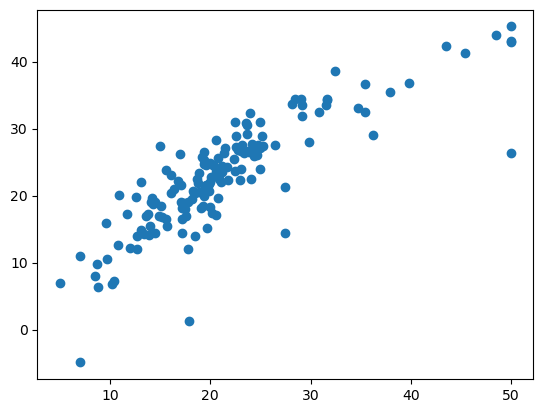

In [46]:
plt.scatter(y_test, lg_pred)

In [47]:
res = y_test - lg_pred
res

173   -7.178348
274   -6.265815
491   -3.367053
72    -3.990358
452   -4.260680
         ...   
441   -1.932183
23     0.024974
225    7.112374
433   -4.399470
447   -7.225302
Name: MEDV, Length: 152, dtype: float64

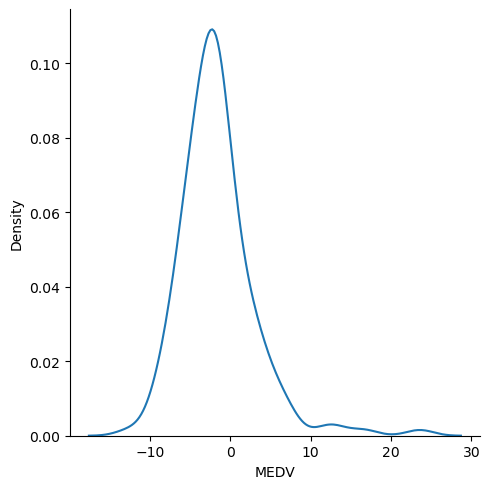

In [48]:
sns.displot(res, kind='kde')

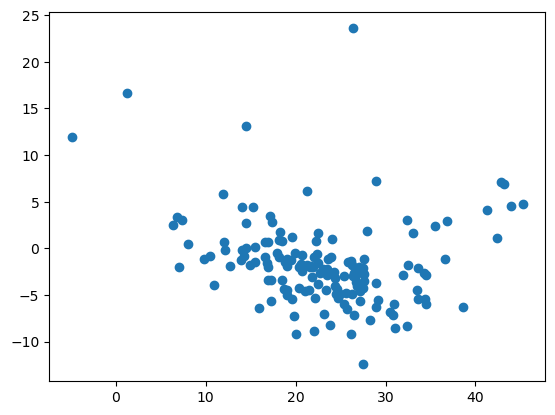

In [49]:
plt.scatter(lg_pred, res)

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
print(mean_absolute_error(y_test,lg_pred))
print(mean_squared_error(y_test,lg_pred))
print(np.sqrt(mean_squared_error(y_test,lg_pred)))

3.7442127931545466
24.13479128906756
4.912717301969202


In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lg_pred)
r2

0.6761000049033605

In [53]:
# adjusted r2_score
aj_r2 = 1 - (1 - r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
aj_r2

0.6455876865246917

## New Data prediction

In [54]:
X_train[0]

array([-0.41425879, -0.50512499, -1.29214218, -0.28154625, -0.85108479,
        0.14526384, -0.365584  ,  1.08162833, -0.74617905, -1.11279004,
        0.18727079,  0.39651419, -1.01531611])

In [55]:
X_tra = X_train[0].reshape(1, -1)
y_tra = scaler.transform(X_tra)
lg.predict(y_tra)

/Users/Peizhi/Desktop/Main/ml_project/boston-house-project/env/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([46.78548813])

## Pickling The Model file for Deployment

In [56]:
import pickle

In [57]:
pickle.dump(lg, open("regmodel.pkl", 'wb'))

In [58]:
pickle_model = pickle.load(open("regmodel.pkl", 'rb'))

In [59]:
# make a prediction
pickle_model.predict(scaler.transform(X_train[0].reshape(1, -1)))

/Users/Peizhi/Desktop/Main/ml_project/boston-house-project/env/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([46.78548813])